In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
sp500_df = pd.read_csv('S&P500.csv')

In [19]:
sp500_df

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.40,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.40,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.40,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.40,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.40,12.27,5.33,98.93,5.29,8.14,NaN
...,...,...,...,...,...,...,...,...,...,...
1763,2017-12-01,2664.34,48.93,109.88,246.52,2.40,2700.13,49.59,111.36,32.09
1764,2018-01-01,2789.80,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31
1765,2018-02-01,2705.16,49.64,NaN,248.99,2.86,2714.34,49.81,NaN,32.12
1766,2018-03-01,2702.77,50.00,NaN,249.55,2.84,2705.82,50.06,NaN,31.99


In [20]:
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df.set_index('Date',inplace=True)
# we will only use the S&P500 index
sp500_df = pd.DataFrame(sp500_df['SP500'],columns=['SP500'])
sp500_df

,SP500
Date,
1871-01-01,4.44
1871-02-01,4.50
1871-03-01,4.61
1871-04-01,4.74
1871-05-01,4.86
...,...
2017-12-01,2664.34
2018-01-01,2789.80
2018-02-01,2705.16


Text(0, 0.5, 'S&P500 Index')

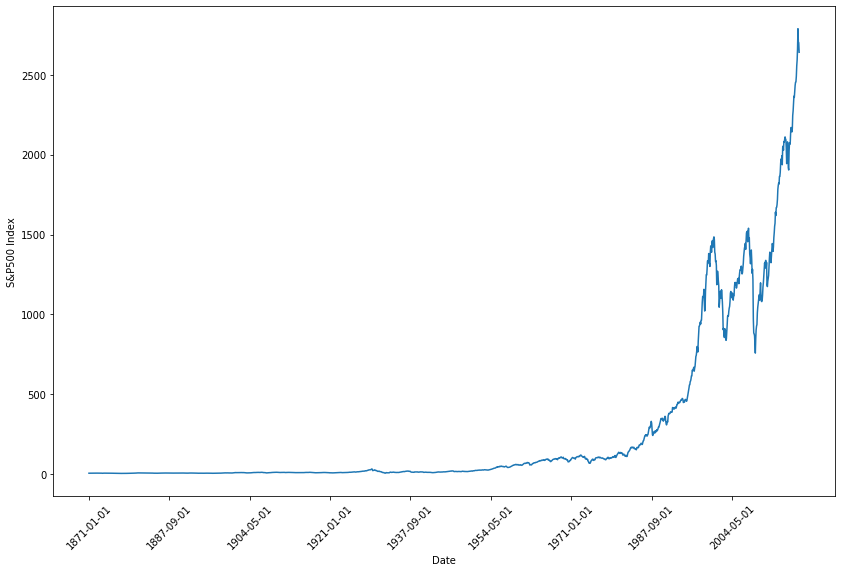

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 9

plt.plot(sp500_df['SP500'])
x = sp500_df.index
plt.xticks(x[::200],rotation=45)
plt.xlabel('Date')
plt.ylabel('S&P500 Index')

In [24]:
sp500_df.describe()

,SP500
count,1768.000000
mean,258.374570
std,514.103382
min,2.730000
25%,7.737500
50%,16.335000
75%,122.525000
max,2789.800000


In [26]:
sp500_df.isnull().sum()

SP500    0
dtype: int64

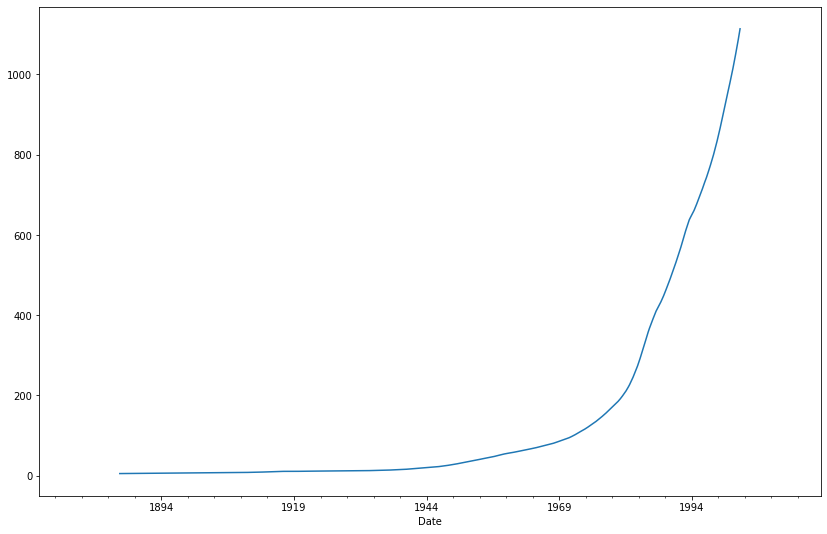

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sp500_df,period=365)
result.trend.plot()
plt.show()